In [1]:
for i in range(20):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [0]:
%tensorflow_version 1.x
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv1D , MaxPool2D
from keras.layers import Activation , Dense , Flatten , Dropout
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of testing examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


Text(0.5, 1.0, '9')

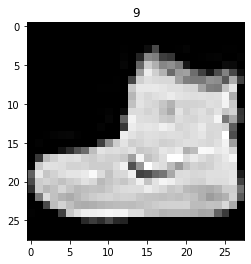

In [5]:
#just to visualize the image in grayscale. 
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])

In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of testing examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train/255
x_test = x_test/255

In [9]:
from keras.utils import np_utils
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",y_train[0])

Class label of first image : 9
After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
#lets define the important parameters and variables to work with the tensors
import numpy as np
learning_rate = 0.001
training_epochs = 2000
cost_history = np.empty(shape=[1],dtype = float)
n_input = x_train.shape[1] #784
n_classes = 10

#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256
 
Xs = tf.placeholder(tf.float32 , [None,n_input])
Ws = tf.Variable(tf.zeros([n_input,n_classes]))
Bs = tf.Variable(tf.zeros([n_classes]))
Ys = tf.placeholder(tf.float32, [None,n_classes])

Epoch: 0000 - cost= 1001.224121094 - Accuracy= 0.1146
Epoch: 0200 - cost= 59.249965668 - Accuracy= 0.6665
Epoch: 0400 - cost= 43.016357422 - Accuracy= 0.6901
Epoch: 0600 - cost= 35.888729095 - Accuracy= 0.7009
Epoch: 0800 - cost= 30.630254745 - Accuracy= 0.7093
Epoch: 1000 - cost= 27.809658051 - Accuracy= 0.7139
Epoch: 1200 - cost= 24.480613708 - Accuracy= 0.7221
Epoch: 1400 - cost= 22.799232483 - Accuracy= 0.7203
Epoch: 1600 - cost= 20.509565353 - Accuracy= 0.7274
Epoch: 1800 - cost= 19.481237411 - Accuracy= 0.7264
Optimization Finished!


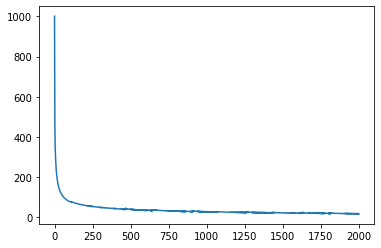

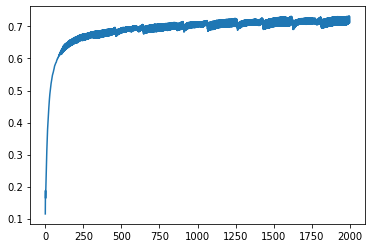

In [18]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(Xs, weights, biases)

# Define loss and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Ys))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(cost_function)

# Initializing the variables
init = tf.global_variables_initializer()
#create an empty list to store the cost history and accuracy history
cost_history = []
accuracy_history = []

# Launch the graph
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
  sess.run(train_step, feed_dict = {Xs:x_train, Ys:y_train})
  cost = sess.run(cost_function, feed_dict = {Xs:x_train, Ys:y_train})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Ys,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  accuracy = (sess.run(accuracy, feed_dict={Xs: x_test, Ys:y_test}))
  accuracy_history = np.append(accuracy_history, accuracy)
  if epoch % 200 ==0:
    print("Epoch:", '%04d' % (epoch), "- cost=", "{:.9f}".format(cost), "- Accuracy=",accuracy)


print("Optimization Finished!")
#plot the cost history
plt.plot(cost_history)
plt.show()
#plot the accuracy history
plt.plot(accuracy_history)
plt.show()
# Test model
#correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Ys, 1))
# Calculate accuracy
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
#print("Accuracy:", accuracy.eval({Xs : x_test, Ys : y_test}))

## Question 2

Similarlylike MLP, define a function that can create single layer network called perceptron on Fashion MNIST.
**Learning rate: 0.0001**
**Epochs: 5000**

Epoch: 0000 - cost= 10.326580048 - Accuracy= 0.1664
Epoch: 0200 - cost= 9.935637474 - Accuracy= 0.1652
Epoch: 0400 - cost= 9.574850082 - Accuracy= 0.1664
Epoch: 0600 - cost= 9.241118431 - Accuracy= 0.1649
Epoch: 0800 - cost= 8.932060242 - Accuracy= 0.1645
Epoch: 1000 - cost= 8.645762444 - Accuracy= 0.1622
Epoch: 1200 - cost= 8.380648613 - Accuracy= 0.1621
Epoch: 1400 - cost= 8.135352135 - Accuracy= 0.1625
Epoch: 1600 - cost= 7.908519268 - Accuracy= 0.1628
Epoch: 1800 - cost= 7.698872089 - Accuracy= 0.1625
Epoch: 2000 - cost= 7.505153179 - Accuracy= 0.1619
Epoch: 2200 - cost= 7.326100826 - Accuracy= 0.1623
Epoch: 2400 - cost= 7.160502434 - Accuracy= 0.1629
Epoch: 2600 - cost= 7.007173538 - Accuracy= 0.1622
Epoch: 2800 - cost= 6.864968777 - Accuracy= 0.1625
Epoch: 3000 - cost= 6.732851028 - Accuracy= 0.1626
Epoch: 3200 - cost= 6.609814644 - Accuracy= 0.1637
Epoch: 3400 - cost= 6.494946957 - Accuracy= 0.1631
Epoch: 3600 - cost= 6.387459278 - Accuracy= 0.164
Epoch: 3800 - cost= 6.286609173

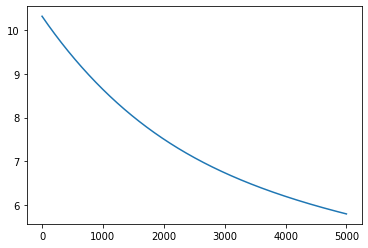

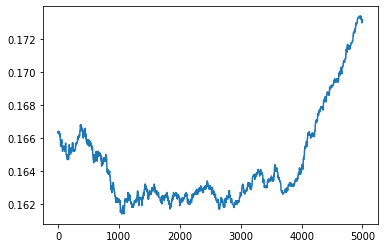

In [19]:
import numpy as np
learning_rate = 0.0001
training_epochs = 5000
cost_history = np.empty(shape=[1],dtype = float)
n_input = x_train.shape[1] #784
n_classes = 10

#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 256
 
Xs = tf.placeholder(tf.float32 , [None,n_input])
Ws = tf.Variable(tf.zeros([n_input,n_classes]))
Bs = tf.Variable(tf.zeros([n_classes]))
Ys = tf.placeholder(tf.float32, [None,n_classes])

def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(Xs, weights, biases)

# Define loss and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Ys))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(cost_function)

# Initializing the variables
init = tf.global_variables_initializer()
#create an empty list to store the cost history and accuracy history
cost_history = []
accuracy_history = []

# Launch the graph
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
  sess.run(train_step, feed_dict = {Xs:x_train, Ys:y_train})
  cost = sess.run(cost_function, feed_dict = {Xs:x_train, Ys:y_train})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Ys,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  accuracy = (sess.run(accuracy, feed_dict={Xs: x_test, Ys: y_test}))
  accuracy_history = np.append(accuracy_history, accuracy)
  if epoch % 200 ==0:
    print("Epoch:", '%04d' % (epoch), "- cost=", "{:.9f}".format(cost), "- Accuracy=",accuracy)


print("Optimization Finished!")
#plot the cost history
plt.plot(cost_history)
plt.show()
#plot the accuracy history
plt.plot(accuracy_history)
plt.show()

## question4:

Now, initialize variables, cost function and optimizer to initiate the training.
**Adam Optimizer**

**with Sindle layer perceptron**

Epoch: 0000 - cost= 17.118431091 - Accuracy= 0.0765
Epoch: 0200 - cost= 4.167418003 - Accuracy= 0.3408
Epoch: 0400 - cost= 2.048495293 - Accuracy= 0.5378
Epoch: 0600 - cost= 1.531478882 - Accuracy= 0.6275
Epoch: 0800 - cost= 1.266046047 - Accuracy= 0.6753
Epoch: 1000 - cost= 1.099820256 - Accuracy= 0.7039
Epoch: 1200 - cost= 0.983404815 - Accuracy= 0.723
Epoch: 1400 - cost= 0.896669030 - Accuracy= 0.7361
Epoch: 1600 - cost= 0.828834653 - Accuracy= 0.7498
Epoch: 1800 - cost= 0.774219811 - Accuracy= 0.7603
Epoch: 2000 - cost= 0.728991687 - Accuracy= 0.7685
Epoch: 2200 - cost= 0.690399110 - Accuracy= 0.7763
Epoch: 2400 - cost= 0.656477988 - Accuracy= 0.7845
Epoch: 2600 - cost= 0.626160622 - Accuracy= 0.791
Epoch: 2800 - cost= 0.598775387 - Accuracy= 0.7955
Epoch: 3000 - cost= 0.573818147 - Accuracy= 0.8014
Epoch: 3200 - cost= 0.550769687 - Accuracy= 0.8063
Epoch: 3400 - cost= 0.529287636 - Accuracy= 0.8105
Epoch: 3600 - cost= 0.509129047 - Accuracy= 0.8149
Epoch: 3800 - cost= 0.490115553 

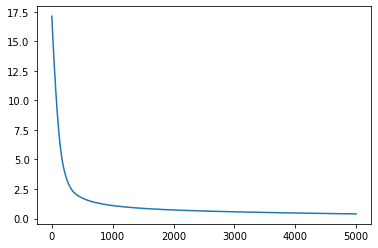

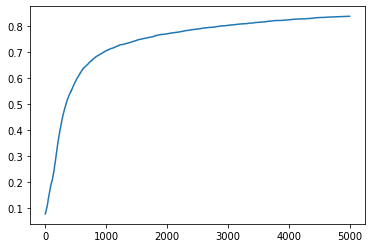

In [11]:
import numpy as np
learning_rate = 0.0001
training_epochs = 5000
cost_history = np.empty(shape=[1],dtype = float)
n_input = x_train.shape[1] #784
n_classes = 10

#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 256
 
Xs = tf.placeholder(tf.float32 , [None,n_input])
Ws = tf.Variable(tf.zeros([n_input,n_classes]))
Bs = tf.Variable(tf.zeros([n_classes]))
Ys = tf.placeholder(tf.float32, [None,n_classes])

def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(Xs, weights, biases)

# Define loss and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Ys))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(cost_function)

# Initializing the variables
init = tf.global_variables_initializer()
#create an empty list to store the cost history and accuracy history
cost_history = []
accuracy_history = []

# Launch the graph
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
  sess.run(train_step, feed_dict = {Xs:x_train, Ys:y_train})
  cost = sess.run(cost_function, feed_dict = {Xs:x_train, Ys:y_train})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Ys,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  accuracy = (sess.run(accuracy, feed_dict={Xs: x_test, Ys: y_test}))
  accuracy_history = np.append(accuracy_history, accuracy)
  if epoch % 200 ==0:
    print("Epoch:", '%04d' % (epoch), "- cost=", "{:.9f}".format(cost), "- Accuracy=",accuracy)


print("Optimization Finished!")
#plot the cost history
plt.plot(cost_history)
plt.show()
#plot the accuracy history
plt.plot(accuracy_history)
plt.show()

**With Multi layer perceptron**

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0000 - cost= 1615.436279297 - Accuracy= 0.1014
Epoch: 0200 - cost= 133.281677246 - Accuracy= 0.5037
Epoch: 0400 - cost= 77.670913696 - Accuracy= 0.6305
Epoch: 0600 - cost= 56.206306458 - Accuracy= 0.6791
Epoch: 0800 - cost= 44.491424561 - Accuracy= 0.7036
Epoch: 1000 - cost= 36.737583160 - Accuracy= 0.7174
Epoch: 1200 - cost= 30.904825211 - Accuracy= 0.725
Epoch: 1400 - cost= 26.255853653 - Accuracy= 0.7343
Epoch: 1600 - cost= 22.415241241 - Accuracy= 0.7406
Epoch: 1800 - cost= 19.255388260 - Accuracy= 0.744
Epoch: 2000 - cost= 16.626661301 - Accuracy= 0.7423
Epoch: 2200 - cost= 14.447650909 - Accuracy= 0.743
Epoch: 2400 - cost= 12.627860069 - Accuracy= 0.7462
Epoch: 2600 - cost= 11.084720612 - Accuracy= 0.7477
Epoch: 2800 - cost= 9.760410309 - Accuracy= 0.7503
Epoch: 3000 - cost= 8.61043262

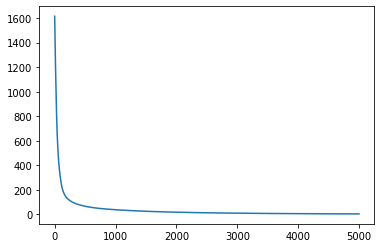

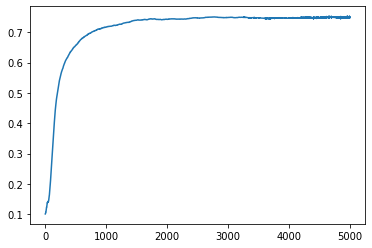

In [10]:
#lets define the important parameters and variables to work with the tensors
import numpy as np
learning_rate = 0.0001
training_epochs = 5000
cost_history = np.empty(shape=[1],dtype = float)
n_input = x_train.shape[1] #784
n_classes = 10

#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256
 
Xs = tf.placeholder(tf.float32 , [None,n_input])
Ws = tf.Variable(tf.zeros([n_input,n_classes]))
Bs = tf.Variable(tf.zeros([n_classes]))
Ys = tf.placeholder(tf.float32, [None,n_classes])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(Xs, weights, biases)

# Define loss and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Ys))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(cost_function)

# Initializing the variables
init = tf.global_variables_initializer()
#create an empty list to store the cost history and accuracy history
cost_history = []
accuracy_history = []

# Launch the graph
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
  sess.run(train_step, feed_dict = {Xs:x_train, Ys:y_train})
  cost = sess.run(cost_function, feed_dict = {Xs:x_train, Ys:y_train})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Ys,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  accuracy = (sess.run(accuracy, feed_dict={Xs: x_test, Ys:y_test}))
  accuracy_history = np.append(accuracy_history, accuracy)
  if epoch % 200 ==0:
    print("Epoch:", '%04d' % (epoch), "- cost=", "{:.9f}".format(cost), "- Accuracy=",accuracy)


print("Optimization Finished!")
#plot the cost history
plt.plot(cost_history)
plt.show()
#plot the accuracy history
plt.plot(accuracy_history)
plt.show()